In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'
#%matplotlib inline
import datetime as dt

In [16]:
SPY = local_csv('spy_return_weekly_95_11.csv', date_column = None, use_date_column_as_index = False)
SPY= SPY.ix[2:, :]

In [40]:
SPY.tail()

,return_index,return_index.1,return_index.2,return_index.3,return_index.4,label
802,1,1.002751,1.001917,0.987412,1.002001,1
803,1,1.003030,0.997391,1.018603,1.031650,1
804,1,0.998942,0.999512,1.003174,1.007080,1
805,1,1.000643,1.001526,0.996947,1.002731,1
806,1,1.002413,1.008769,1.011907,1.010459,1


#Model Training&Validation 
**Train set contains SPY daily adjusted close price from year 1995 to 2011**

In [25]:
train = []
for ind, row in SPY.iterrows():
        train.append(row.tolist())
X = np.array(train)[:, :-1]
y = np.array(train)[:,-1]
n_sample = len(train)
n_sample
rows = np.random.permutation(np.arange(n_sample))
split = int(n_sample * 0.7)
X_train, X_test = X[rows[:split]], X[rows[split:]]
y_train, y_test = y[rows[:split]], y[rows[split:]]

In [59]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [60]:
from sklearn.metrics import classification_report
def knn(train,test,w):
    preds=[]
    for ind,i in enumerate(test):
        min_dist=float('inf')
        closest_seq=[]
        for j in train:            
            dist=DTWDistance(i[:-1],j[:-1],w)
            if dist<min_dist:
                min_dist=dist
                closest_seq=j
        preds.append(closest_seq[-1])
    return classification_report(test[:,-1],preds), preds

In [28]:
data = np.array(train)

In [29]:
Train = data[rows[:split]]
Test = data[rows[split:]]

In [31]:
a, preds = knn(Train,Test,5)
print a

             precision    recall  f1-score   support

        0.0       0.52      0.45      0.48       115
        1.0       0.56      0.62      0.59       127

avg / total       0.54      0.54      0.54       242



In [61]:
def knn_classifer(train,test,w):
    preds=[]
    for ind,i in enumerate(test):
        min_dist=float('inf')
        closest_seq=[]
        for j in train:            
            dist=DTWDistance(i,j[:-1],w)
            if dist<min_dist:
                min_dist=dist
                closest_seq=j
        preds.append(closest_seq[-1])
    return preds

##Back Test 

In [1]:
# Import Zipline, the open source backester, and a few other libraries that we will use
import zipline
from zipline import TradingAlgorithm
from zipline.api import order_target, record, symbol, history, add_history
import pytz
from datetime import datetime
import matplotlib.pyplot as pyplot
import numpy as np

In [2]:
Train = np.array(train)

NameError: name 'train' is not defined

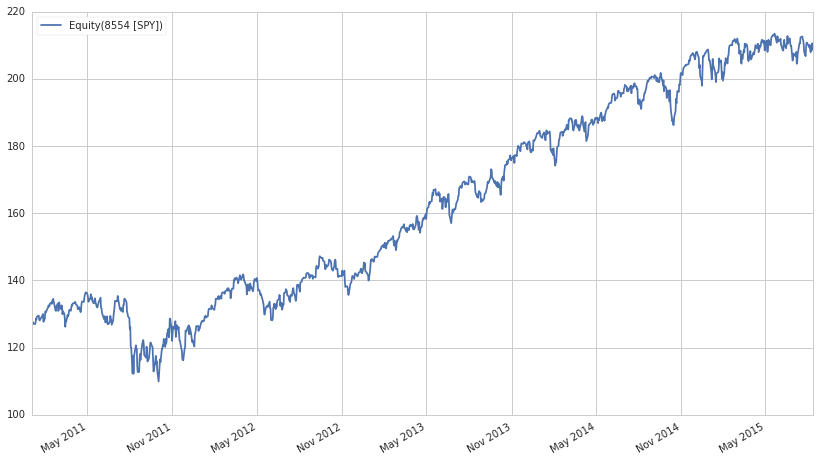

In [104]:
data = get_pricing(
    ['SPY'],
    start_date='2011-01-01',
    end_date = '2015-08-12',
    frequency='daily'
)
data.price.plot(use_index=True)

In [ ]:
x = 

In [182]:
data.price.head()

,Equity(8554 [SPY])
2011-01-03 00:00:00+00:00,127.05
2011-01-04 00:00:00+00:00,126.93
2011-01-05 00:00:00+00:00,127.63
2011-01-06 00:00:00+00:00,127.39
2011-01-07 00:00:00+00:00,127.12


In [151]:
labels = local_csv('pred_label.csv', date_column = None, use_date_column_as_index = False)

In [184]:
benchmark = data.price * (100000.0/127.05)

AttributeError: 'float' object has no attribute 'plot'

In [177]:
def initialize(context):
    # Register 2 histories that track daily prices,
    context.spy = symbol('SPY')
    context.i = 0

def handle_data(context, data):
    context.i += 1
    if context.i < 5:
        return
    if (context.i % 5) != 1:
        return 
    index = context.i /5 -1
    current_price = data[context.spy].price
    share = np.round(100000.0/current_price)
    if labels['label'][index] == 1:
        order_target(context.spy, 500)
        record(long_price=data[context.spy].price)
    else:
        order_target(context.spy, 0)
        record(short_price=data[context.spy].price)

In [188]:
# Analyze is a post-hoc analysis method available on Zipline. 
# It accepts the context object and 'perf' which is the output 
# of a Zipline backtest.  This API is currently experimental, 
# and will likely change before release.
def analyze(context, perf):
    fig = pyplot.figure()    
    # Make a subplot for portfolio value.
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1, figsize=(16,12), label ='Portfolio')
    benchmark = data.price * (100000.0/127.05)
    benchmark.plot(ax=ax1, figsize = (6,12), label = 'SPY')
    ax1.set_ylabel('portfolio value in $')
    ax1.legend(loc=0)
    # Make another subplot showing our trades.
    ax2 = fig.add_subplot(212)
    perf['long_price'].plot(ax=ax2, figsize=(16, 12),label='Long Point',color='r')
    perf['short_price'].plot(ax=ax2, figsize=(16, 12),label= 'Short Point',color='b')
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    # Set figure metadata
    ax2.set_ylabel('price in $')
    pyplot.legend(loc=0)
    pyplot.show()
    ax2.

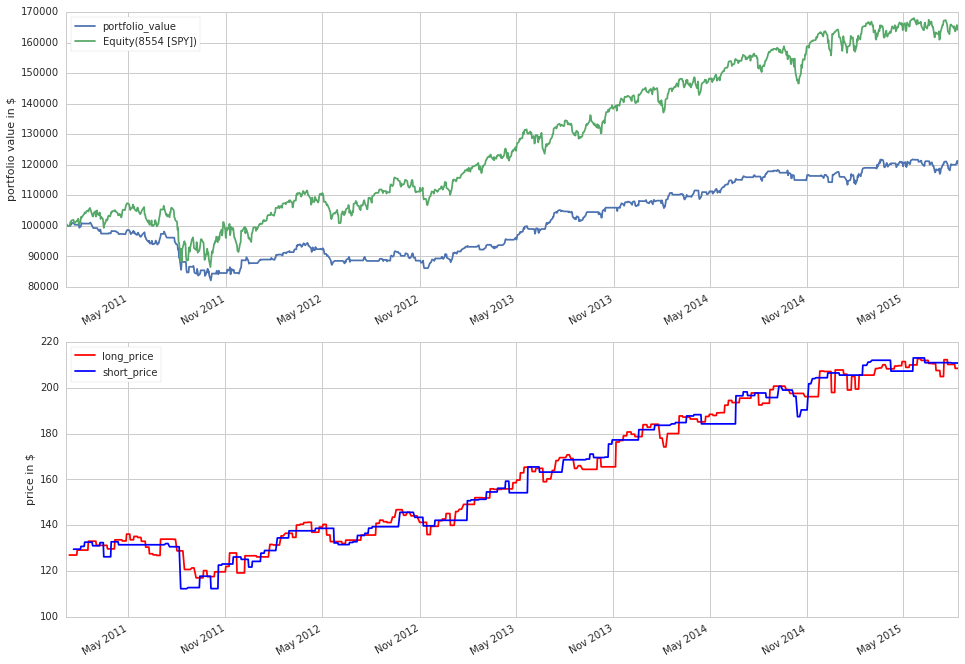

In [189]:
# NOTE: This cell will take a few minutes to run.

# Create algorithm object passing in initialize and
# handle_data functions
algo_obj = TradingAlgorithm(
    initialize=initialize, 
    handle_data=handle_data)

# HACK: Analyze isn't supported by the parameter-based API, so
# tack it directly onto the object.
algo_obj._analyze = analyze

# Run algorithm
perf_manual = algo_obj.run(data.transpose(2,1,0))